# MCB 112 Homework 11
Gita Abhiraman

## Part 1: K-Means

In [1]:
import numpy as np
import math
from scipy import stats
import numpy.random as rand
from collections import Counter
import pandas as pd
import scipy.spatial.distance as dis
import matplotlib.pyplot as plt
%matplotlib notebook

file_name="w11-data.tbl"

#read in the file
all_info=[]
with open(file_name, "r") as data_file:
    #ignore header line
    data_file.readline()
    for line in data_file:
        line_info=line.split()
        all_info.append(tuple([float(line_info[i]) for i in range(len(line_info))]))

coords=np.array(all_info)      

log_coords = np.log(coords)

# Define number of clusters
num_clust = 8

In [2]:
# changed dimensions from 2 to 2001
# note to grader: sometimes this doesn't run at first, but rerunning works

def assignment(coords,centers):  
    
    '''
    Return current cluster assigned to each point, as well as the 
    sum of this distances between each point and its assigned cluster
    '''
    
    # Find minimum distance between a point and each center
    coords = np.array(coords)
    centers = np.array(centers)
    
    distances = np.zeros(200)
    clusters = np.zeros(200)
    
    for j in range(0, 200):
        best_dist = 10000000
        for i in range(0, num_clust):
            distance = 0
            for k in range(0, 2001):
                distance = distance + (coords[j][k]-centers[i][k])**2
            distance = np.sqrt(distance)
            if (distance < best_dist):
                best_dist = distance
                best_clust = i
        distances[j] = best_dist
        clusters[j] = best_clust
        
    # Count how many points in each cluster
    c = Counter(clusters)
    
    # Look for empty clusters
    for x in set(range(len(centers))).difference(set(c.keys())):
        clusters,distances =  assign_empty(x,clusters,distances)
        
    distance = sum(distances)
    return clusters, distance

def assign_empty(c,clusters,distances):
    
    # find index of point furthest from its assigned center
    max_idx = np.argmax(distances)
    
    # set distances at that index to 0
    distances[max_idx] = 0
    
    # set clusters at that index to empty cluster
    clusters[max_idx] = c
    
    return clusters,distances

def update(coords, clusters, num_clust):
    
    '''
    Calculates the new cluster centers as an average of the positions of all 
    points included in the cluster.
    '''
    
    coords = np.asarray(coords)

    # Find indices of each point assigned to each cluster

    clustered_data = []
    centers = []
    for i in range(0,num_clust):
        clustered_data.append([])
        for j in range(0,200):
            if clusters[j] == i:
                clustered_data[i].append(coords[j])
    
    for x in range(0,num_clust):
        center_coords = np.zeros(2001)
        for i in range(2001):
            center_coords[i]= np.mean(np.array(clustered_data[x])[:,i])
        centers.append(center_coords)    
    return(centers)
    
# Initalize best clusters
min_dist = float('inf')
clusters_best = []

# Loop on iters until negligible change in min_dist

while True:    
    # Each iteration starts with a random set of centers
    centers = rand.uniform(low = np.min(log_coords), high = np.max(log_coords), size=(num_clust,2001))
    
    # Start with empty clusters
    clusters_old = []*len(log_coords)
    clusters = [0]*len(log_coords)
   
    # Iterate until clusters don't change
    old_dist = 0
    while True:
        # Update clusters

        clusters_old = clusters
        
        # New Assignment 
        [clusters,distance] = assignment(log_coords,centers)        
        
        if (np.abs(distance - old_dist) < 0.1):
            break
            
        # New centers
        centers = update(log_coords, clusters, num_clust)
        print('dist', distance)
        old_dist=distance
        
    # Save clusters and centers if it has minimal sum distance to date
    
    if (distance < min_dist):  
        min_dist = distance
        centers_best = centers
        clusters_best = clusters
    
    if ((min_dist - distance)<0.1):
        break
    
print('min distance', min_dist)

dist 21301.699290159293
dist 4238.711574560119
dist 4224.000344984849
dist 4201.057777798755
dist 4183.538555892842
dist 4151.671429233048
dist 4145.556120457859
dist 4145.174438928771
min distance 4145.174438928771


Using the k-means algorithm above, modified from pset 6 to include 2001 dimensions, I found the minimum distance to be about 4170, which is similar to what Watson found. I ran the algorithm until there was a change of less than 1 in the minimum distance.

## Part 2

Use singular value decomposition to find the principal components of the data set.


In [3]:
coords=np.array(all_info)      
log_coords = np.log(coords)
data = np.zeros(shape = (200,2001))

# subtract mean from each data point
for i in range(200):
    for j in range(2001):
        data[i,j] = log_coords[i,j] - np.mean(log_coords[:,j])

<IPython.core.display.Javascript object>


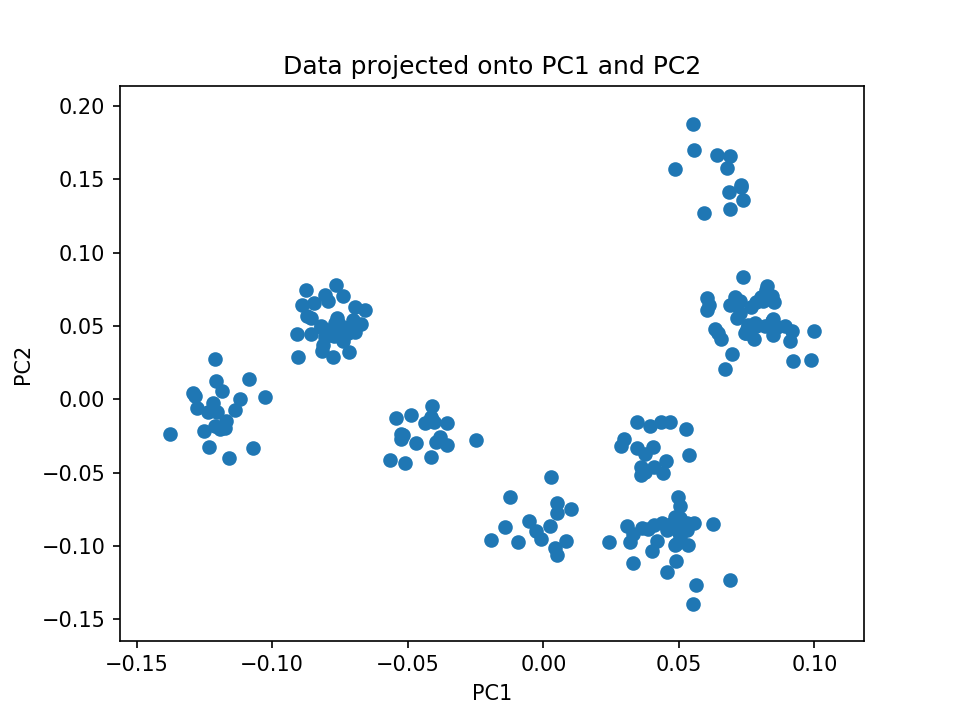

In [4]:
U,S,W=np.linalg.svd(data)      

# calculate eigenvalues
eig = np.zeros(len(data))
for i in range(len(data)):
    eig[i]=(S[i]*S[i])/(len(data)-1)
    
# sort eigenvalues
idx = np.argsort(eig)
coeff = W[idx,:]

# plot data projected onto PC1 and PC2
plt.figure(1)
plt.scatter(U[:,0], U[:,1])
plt.title("Data projected onto PC1 and PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

<IPython.core.display.Javascript object>


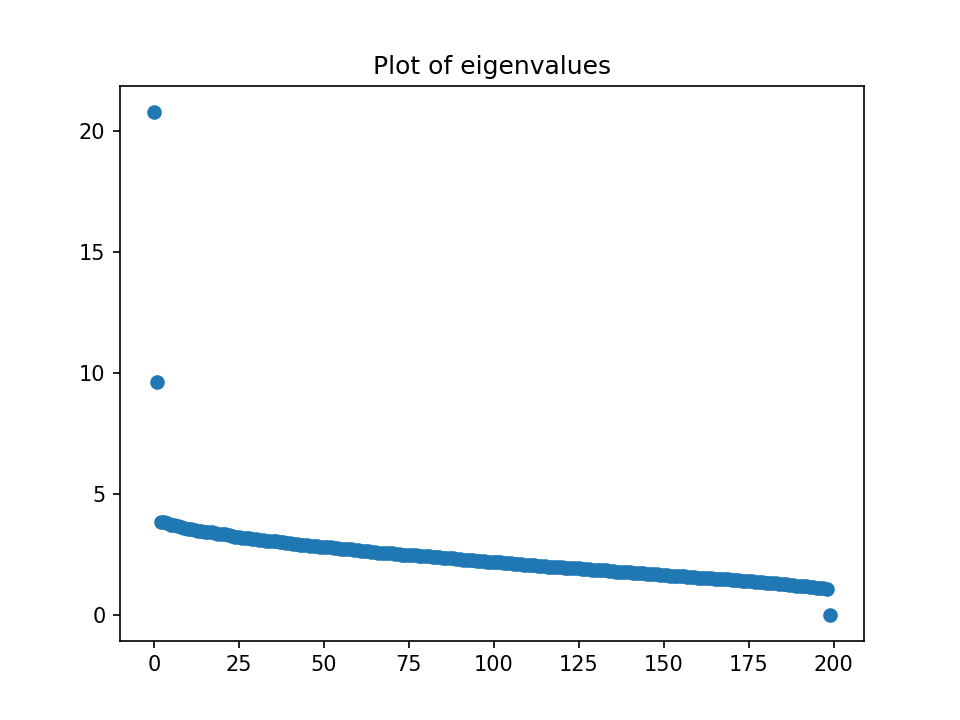

In [5]:
plt.figure(2)
plt.scatter(idx, eig[idx])
plt.title("Plot of eigenvalues")
plt.show()

In [8]:
file_name="w11-eigen.tbl"

#read in the file
neg_data=[]
with open(file_name, "r") as data_file:
    #ignore header line
    data_file.readline()
    for line in data_file:
        fields = line.split()
        neg_data.append(float(fields[1]))

<IPython.core.display.Javascript object>


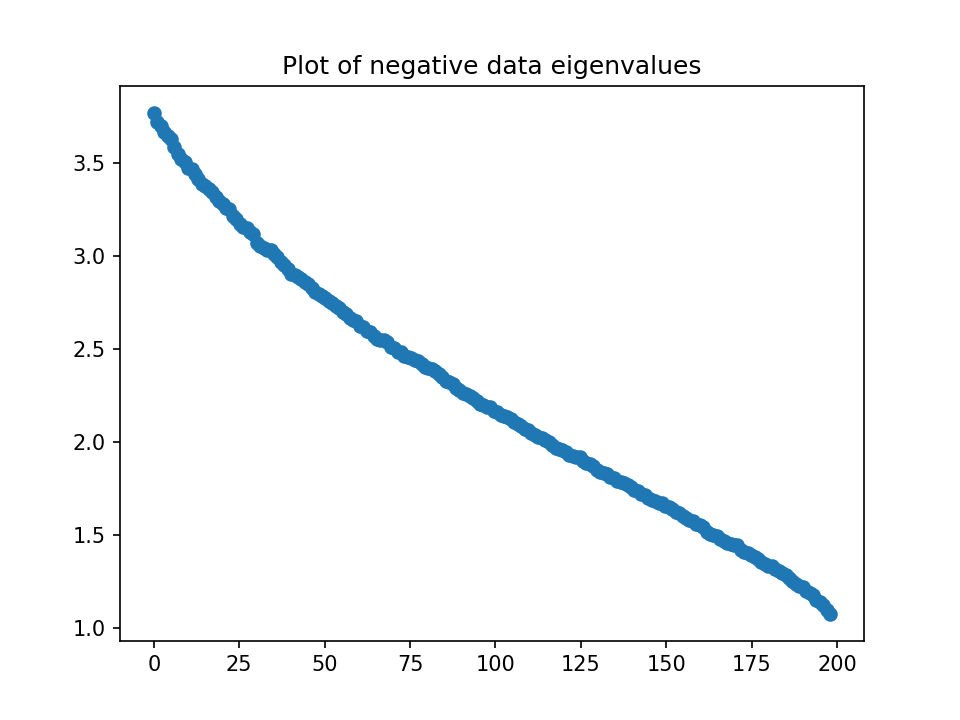

In [9]:
plt.figure(3)
index = np.linspace(0, len(neg_data), len(neg_data))
neg_data = np.array(neg_data)
plt.scatter(index, neg_data)
plt.title("Plot of negative data eigenvalues")
plt.show()

<IPython.core.display.Javascript object>


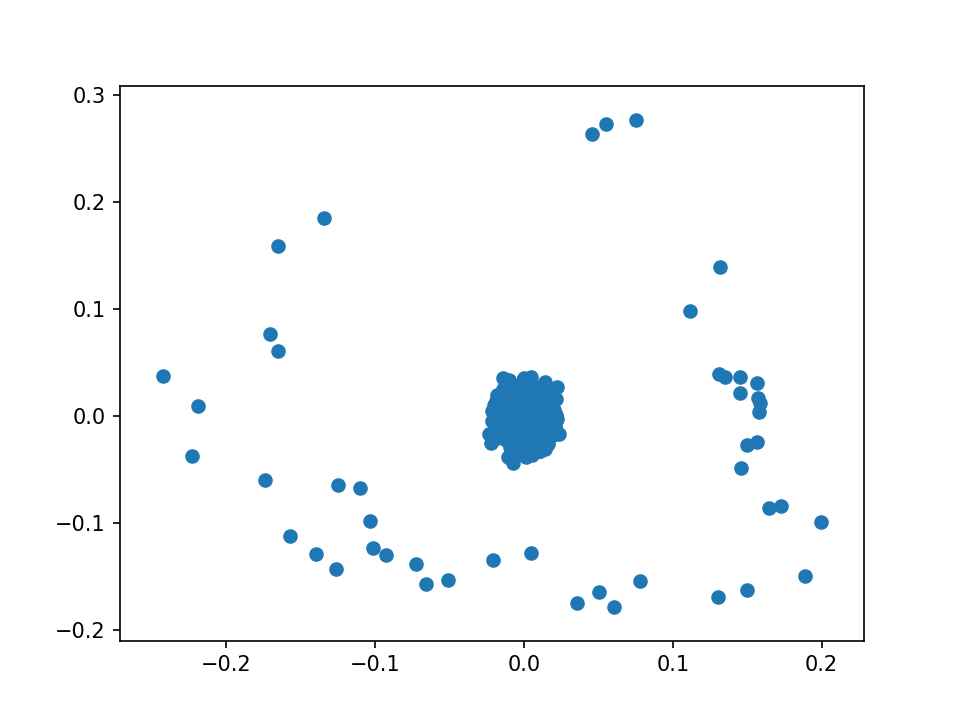

In [10]:
# determine influential genes
idx = np.argsort(eig)
idx = idx[::-1]
co = W[idx,:]
plt.figure(4)
plt.scatter(co[0,:], co[1,:])
plt.show()

In [12]:
impt_genes = []
for i in range(200):
    #print(co[0,i] + co[1,i])
    if (co[0,i] + co[1,i] > 0.01):
        impt_genes.append(i)

        
print('Number of important genes')
print(len(impt_genes))
    

Number of important genes
46


It is reasonable to assume 8 clusters. We see 8 clusters emerge when we plot the projection onto the 2 principal components (figure 1). Focusing on the first two principal components is reasonable because the order of magnitude of eigenvalues quickly drops off (figure 2). This is in sharp contrast to the negative control data set, where all eigenvalues are the same order of magnitude and the decrease is linear (figure 3). 

Based on the eigenvector loadings, 46 genes appear to affect cell type when we count only those genes whose coefficients (for the first two principal components) sum to above a threshold of 0.01. 


## Part 3

<IPython.core.display.Javascript object>


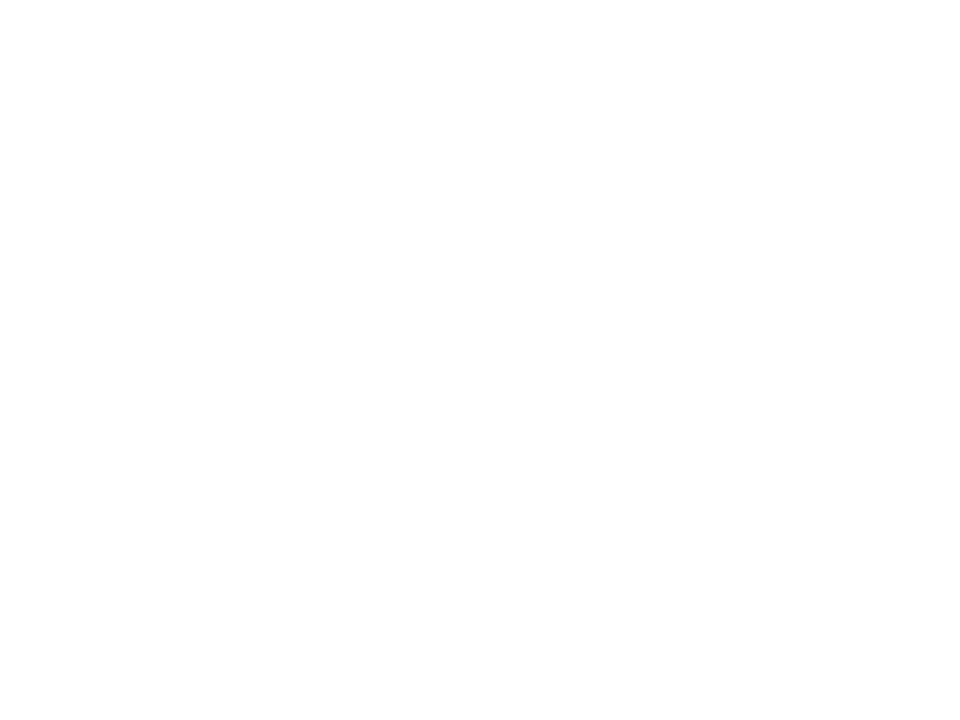

<IPython.core.display.Javascript object>


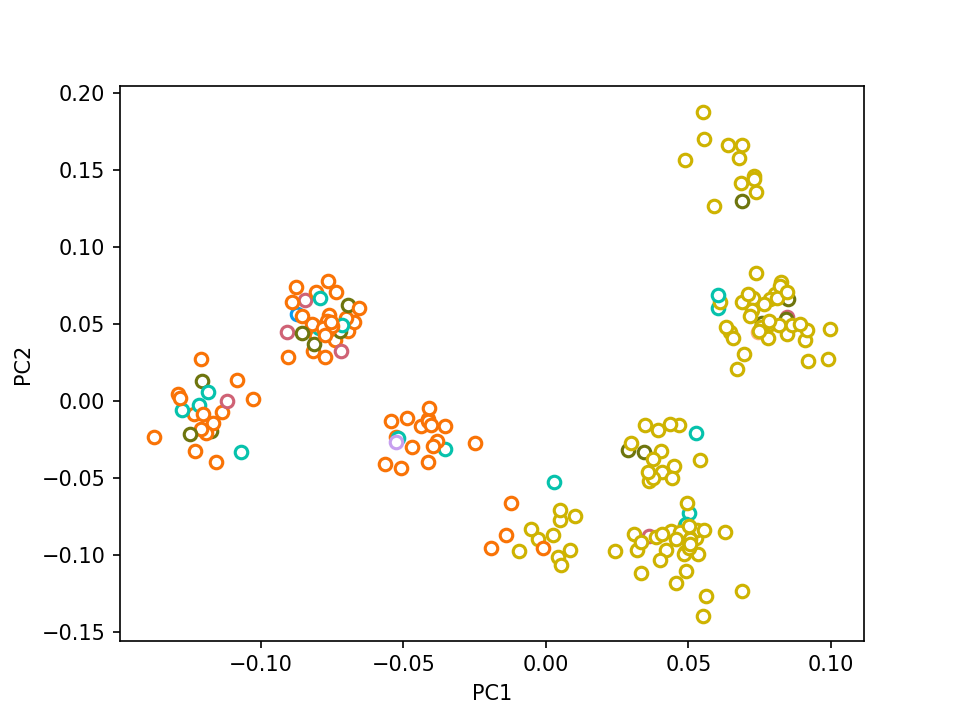

In [13]:
# Visualize bad k-means from part 1
colormap = ['xkcd:orange', 'xkcd:olive','xkcd:azure',    'xkcd:rose', 'xkcd:mustard', 'xkcd:peach',  'xkcd:turquoise', 'xkcd:lavender', 'xkcd:rust', 'xkcd:red']
plt.figure()
centers = np.array(centers)
clusters = clusters.astype(int)
Q = 8

for k in range(1):
    fig, ax = plt.subplots()
    for i in range(200):
        edgecolor = colormap[clusters[i]]
        fillcolor = 'w'
        shape     = 'o'
        ax.plot(U[i,0], U[i,1], marker=shape, mec=edgecolor, mfc=fillcolor, mew=1.5)

    #for q in range(Q):
        #ax.plot(np.array(centers)[q,0], np.array(centers)[q,1], '*k', ms=10)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

Clearly this k-means is not working.

Instead, a better method would be to run the k-means algorithm on the data projected onto the first two principal components, since we see 8 distinct clusters in that scatter plot.

In [43]:
# Rerun k-means on data projected in PC1, PC2
# Note to grader: sometimes this works better if refreshed or run twice.

def assignment(coords,centers):  
    
    '''
    Return current cluster assigned to each point, as well as the 
    sum of this distances between each point and its assigned cluster
    '''
    # Find minimum distance between a point and each center
    coords = np.array(coords)
    centers = np.array(centers)
    
    distances = np.zeros(200)
    clusters = np.zeros(200)
    
    for j in range(0, 200):
        best_dist = 1000
        for i in range(0, num_clust):
            distance = 0
            for k in range(0, 2):
                distance = distance + (coords[j][k]-centers[i][k])**2
            distance = np.sqrt(distance)
            if (distance < best_dist):
                best_dist = distance
                best_clust = i
        distances[j] = best_dist
        clusters[j] = best_clust
        
    # Count how many points in each cluster
    c = Counter(clusters)
    
    # Look for empty clusters
    for x in set(range(len(centers))).difference(set(c.keys())):
        clusters,distances =  assign_empty(x,clusters,distances)
        
    distance = sum(distances)
    return clusters, distance


def update(coords, clusters, num_clust):
    
    '''
    Calculates the new cluster centers as an average of the positions of all 
    points included in the cluster.
    '''
    
    coords = np.asarray(coords)
    # Find indices of each point assigned to each cluster

    clustered_data = []
    centers = []
    for i in range(0,num_clust):
        clustered_data.append([])
        for j in range(0,200):
            if clusters[j] == i:
                clustered_data[i].append(coords[j])
    
    for x in range(0,num_clust):
        center_coords = np.zeros(2)
        for i in range(2):
            center_coords[i]= np.mean(np.array(clustered_data[x])[:,i])
        centers.append(center_coords)    
    return(centers)
    

while True:
    # Each iteration starts with a random set of centers
    centers = rand.uniform(low = np.min(U[:,0:2]), high = np.max(U[:,0:2]), size=(num_clust,2))
    
    # Start with empty clusters
    clusters_old = []*len(log_coords)
    clusters = [0]*len(log_coords)
   
    # Iterate until clusters don't change
    old_dist = 0
    min_dist = 100
    #for i in range(100):
    while True:
        # Update clusters

        clusters_old = clusters
        
        # New Assignment 
        [clusters,distance] = assignment(U[:,0:2],centers)        
        
        if (np.abs(distance - old_dist) < .01):
            break
            
        # New centers
        centers = update(U[:,0:2], clusters, num_clust)
        print('dist', distance)
        old_dist=distance
        
    # Save clusters and centers if it has minimal sum distance to date
    
    if (distance < min_dist):  
        min_dist = distance
        centers_best = centers
        clusters_best = clusters
    
    if ((min_dist - distance)<.01):
        break
    
print('min distance', min_dist)

dist 13.4090643013
dist 5.87638568615
dist 4.58824417268
dist 4.46015583795
min distance 4.45208900097


<IPython.core.display.Javascript object>


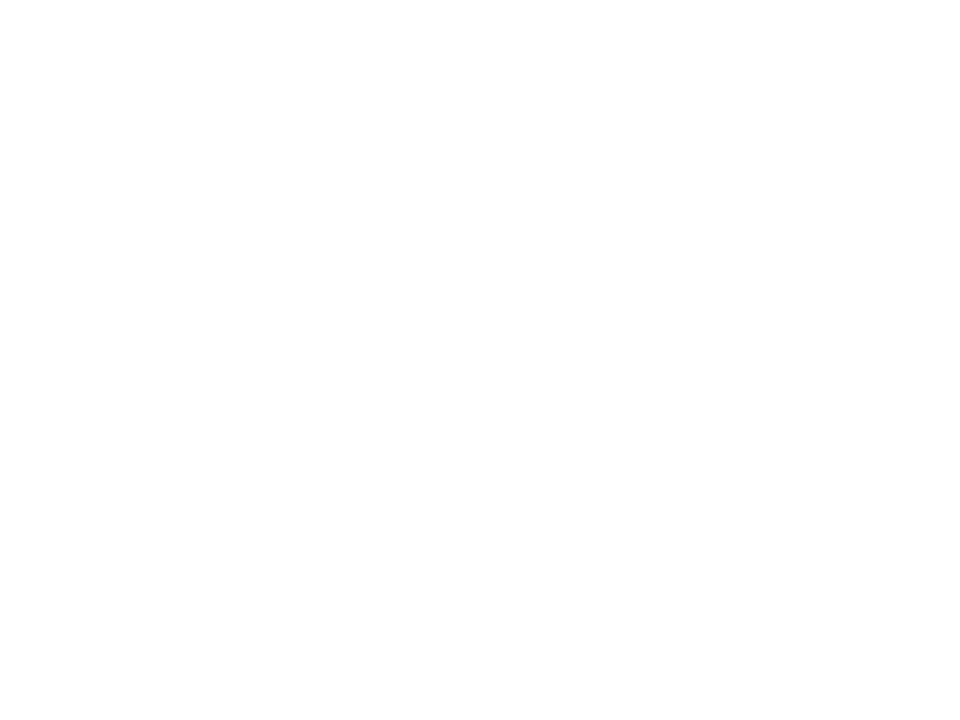

<IPython.core.display.Javascript object>


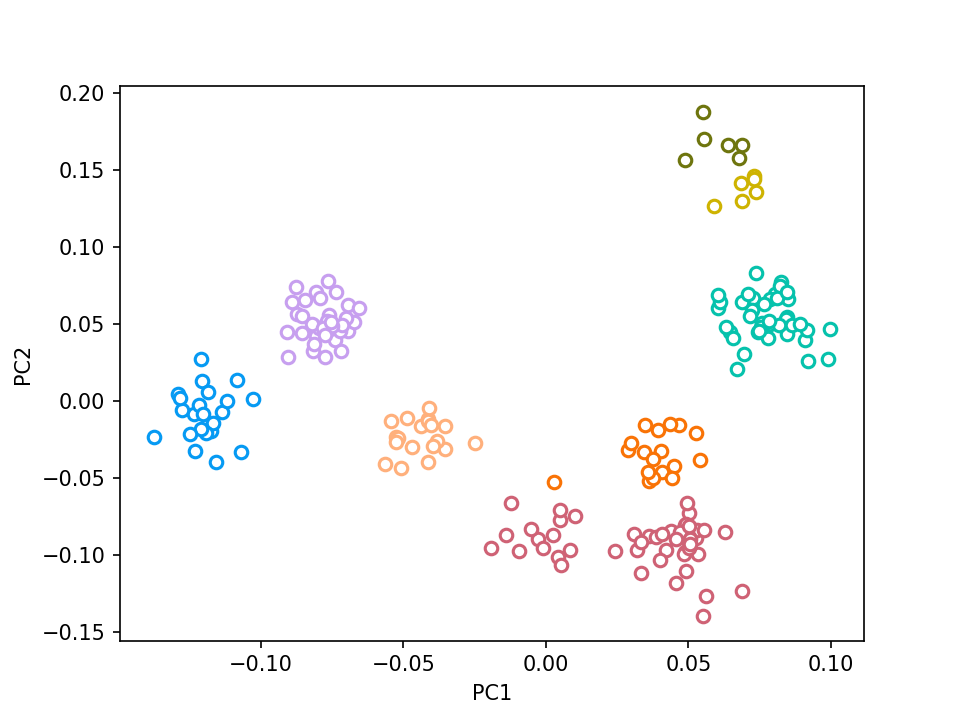

In [41]:
colormap = ['xkcd:orange', 'xkcd:olive','xkcd:azure',    'xkcd:rose', 'xkcd:mustard', 'xkcd:peach',  'xkcd:turquoise', 'xkcd:lavender', 'xkcd:rust', 'xkcd:red']
plt.figure()
centers = np.array(centers)
clusters = clusters.astype(int)
Q = 8
for k in range(1):
    fig, ax = plt.subplots()
    for i in range(200):
        edgecolor = colormap[clusters[i]]
        fillcolor = 'w'
        shape     = 'o'
        ax.plot(U[i,0], U[i,1], marker=shape, mec=edgecolor, mfc=fillcolor, mew=1.5)

    #for q in range(Q):
        #ax.plot(np.array(centers)[q,0], np.array(centers)[q,1], '*k', ms=10)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

This looks much better! Having re-run our k-means algorithm on the data projected into two principal components, the 8 clusters are different colors as we expect.

## Part 4


In [42]:
# Reconstruct data using first two principal components

X_new = U[:, :2]@np.diag(S[:2])@W[:2,:]

# Add only the genes determined to be important in part 2
X_new_impt = []
for i in range(len(impt_genes)):
    X_new_impt.append(X_new[:,i])

# Identify and append which cluster each sample belonged to
row = np.zeros(200)
for i in range(200):
    row[i] = clusters[i]

X_new_impt.append(row)
X_new_impt = np.array(X_new_impt).transpose()

# Sort the samples by cluster
X_sorted = X_new_impt[X_new_impt[:,46].argsort()]
X_sorted = X_sorted[:,:-1]

<IPython.core.display.Javascript object>


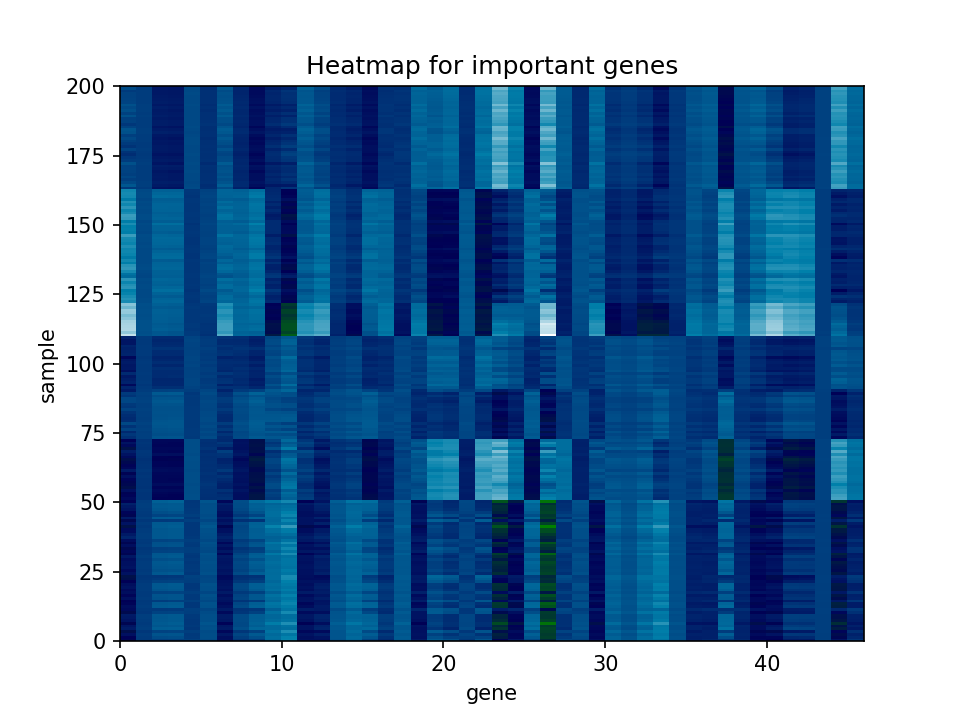

In [17]:
fig, ax = plt.subplots()
ax.pcolor(np.array(X_sorted), cmap = 'ocean')
plt.xlabel('gene')
plt.ylabel('sample')
plt.title('Heatmap for important genes')

The clusters now look much more obvious in this heat map! You can see the delineations between the 8 clusters in the borders between rectangular patches. You can also tell that these 46 "important genes" have distinct expression patterns in the 8 different clusters. The patterns are much more clear once we group by the clusters assigned by the corrected k-means, when the data is projected into two principal components. 